In [1]:
!tree --dirsfirst --filelimit 5 "Movies/cell_images"

Movies/cell_images
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
├── Uninfected [13780 entries exceeds filelimit, not opening dir]
├── tensorboard_logs2
│   ├── 20191111-194221
│   │   ├── train
│   │   │   ├── plugins
│   │   │   │   └── profile
│   │   │   │       └── 2019-11-11_19-42-31
│   │   │   │           └── local.trace
│   │   │   ├── events.out.tfevents.1573481541.Chiranjeevs-MacBook-Air.local.14927.442.v2
│   │   │   └── events.out.tfevents.1573481551.Chiranjeevs-MacBook-Air.local.profile-empty
│   │   └── validation
│   │       └── events.out.tfevents.1573482048.Chiranjeevs-MacBook-Air.local.14927.2084.v2
│   └── 20191111-200614
│       ├── train
│       │   ├── plugins
│       │   │   └── profile
│       │   │       └── 2019-11-11_20-06-23
│       │   │           └── local.trace
│       │   ├── events.out.tfevents.1573482974.Chiranjeevs-MacBook-Air.local.15429.442.v2
│       │   └── events.out.tfevents.1573482983.Chiranjeevs-MacBook-Air.local.profile-

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import csv
import glob
import time

from PIL import Image
import matplotlib.pyplot as plt
import os

import random
random_seed=33

# Reading the Images

In [3]:
base_dir = os.path.join('Movies/cell_images')
infected_dir = os.path.join(base_dir,'Parasitized')
healthy_dir = os.path.join(base_dir,'Uninfected')

infected_files = glob.glob(infected_dir+'/*.png')
healthy_files = glob.glob(healthy_dir+'/*.png')
len(infected_files), len(healthy_files)


(13779, 13779)

In [4]:
#Creating data frame of the files
np.random.seed(42)

files_df = pd.DataFrame({
    'filename': infected_files + healthy_files,
    'label': ['malaria'] * len(infected_files) + ['healthy'] * len(healthy_files)
}).sample(frac=1, random_state=42).reset_index(drop=True)

files_df.head()

,filename,label
0,Movies/cell_images/Parasitized/C180P141NThinF_...,malaria
1,Movies/cell_images/Parasitized/C84P45ThinF_IMG...,malaria
2,Movies/cell_images/Uninfected/C204ThinF_IMG_20...,healthy
3,Movies/cell_images/Uninfected/C76P37ThinF_IMG_...,healthy
4,Movies/cell_images/Uninfected/C141P102ThinF_IM...,healthy


##  Visualizations

In [5]:
%%time
from PIL import Image
import os
from tqdm import tqdm_notebook

main_address='Movies/cell_images/Parasitized'
images_address=os.listdir(main_address)

#storage reason
images_address.remove('Thumbs.db')

parasitized_data=np.zeros((len(images_address),125,125,3),dtype=np.int16)

print("Importing Parasitized Data...")

#for loop for enumerating in image folder

for ind,img_address in tqdm_notebook(enumerate(images_address),total=len(images_address)):
    img=Image.open(main_address+'/'+img_address)
    img=img.resize((125,125),Image.ANTIALIAS)
    img=np.asarray(img)
    img=img.astype(np.int16)
    parasitized_data[ind]=img
print("Done Importing Parasitized Data!")


Importing Parasitized Data...



Done Importing Parasitized Data!
CPU times: user 39.9 s, sys: 5.3 s, total: 45.2 s
Wall time: 1min 6s


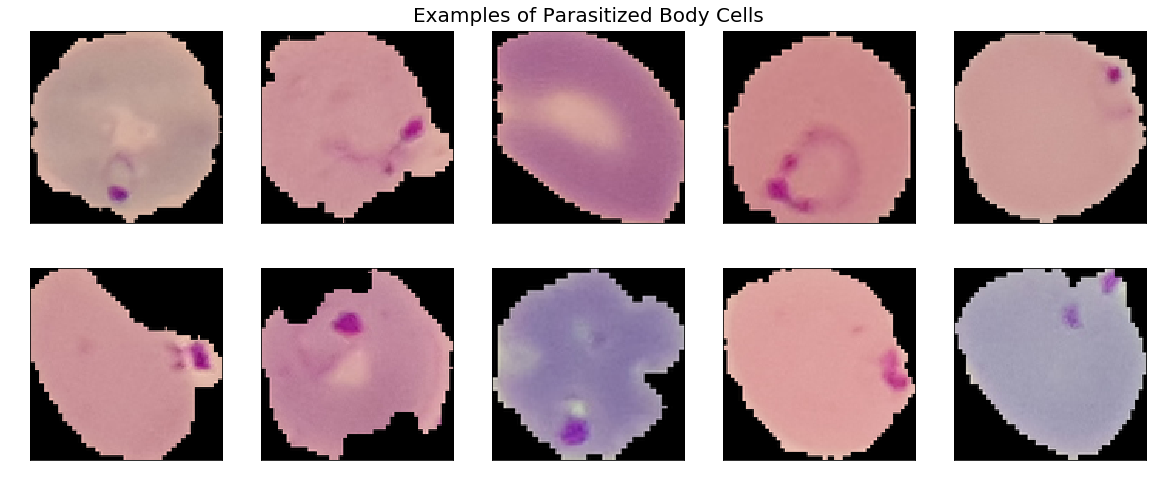

In [6]:
np.random.seed(random_seed)
random_10=np.random.randint(0,parasitized_data.shape[0],size=10)
fig=plt.figure(figsize=(20,8))
plt.title("Examples of Parasitized Body Cells",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(parasitized_data[rand])
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

In [7]:
main_address='Movies/cell_images/Uninfected'
images_address=os.listdir(main_address)
images_address.remove('Thumbs.db')
uninfected_data=np.zeros((len(images_address),125,125,3),dtype=np.int16)

print("Importing Uninfected Data...")
for ind,img_address in tqdm_notebook(enumerate(images_address),total=len(images_address)):
    img=Image.open(main_address+'/'+img_address)
    img=img.resize((125,125),Image.ANTIALIAS)
    img=np.asarray(img)
    img=img.astype(np.int16)
    uninfected_data[ind]=img
print("Done Importing Uninfected Data!")


Importing Uninfected Data...



Done Importing Uninfected Data!


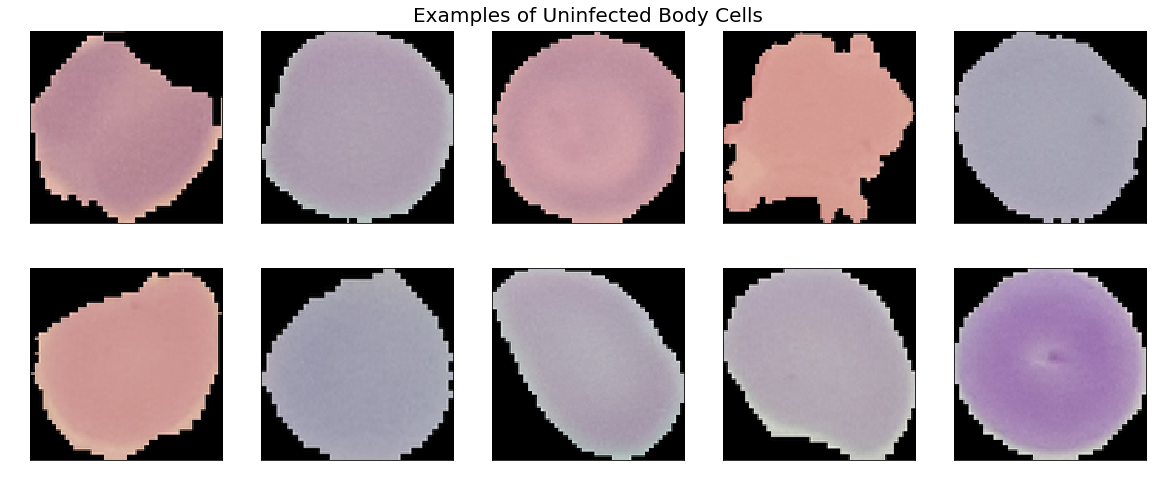

In [8]:
np.random.seed(random_seed)
random_10=np.random.randint(0,uninfected_data.shape[0],size=10)
fig=plt.figure(figsize=(20,8))
plt.title("Examples of Uninfected Body Cells",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(uninfected_data[rand])
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

[7188]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


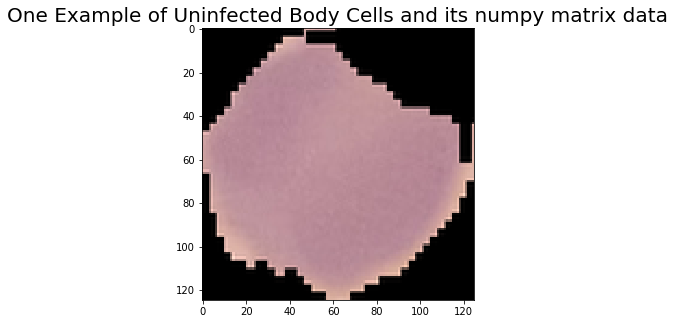

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int16)

In [9]:
np.random.seed(random_seed)
random_1=np.random.randint(0,uninfected_data.shape[0],size=1)
fig=plt.figure(figsize=(15,5))
plt.title("One Example of Uninfected Body Cells and its numpy matrix data",fontsize=20)

print(random_1)

for ind,rand in enumerate(random_1):
    ax_n=fig.add_subplot(1,1,ind+1)
    ax_n.imshow(uninfected_data[rand])
   
plt.show()
uninfected_data[random_1][0]

In [10]:
uninfected_data[7188][124][60]

array([221, 179, 163], dtype=int16)

In [11]:
uninfected_data[7188][124]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0

[2439]


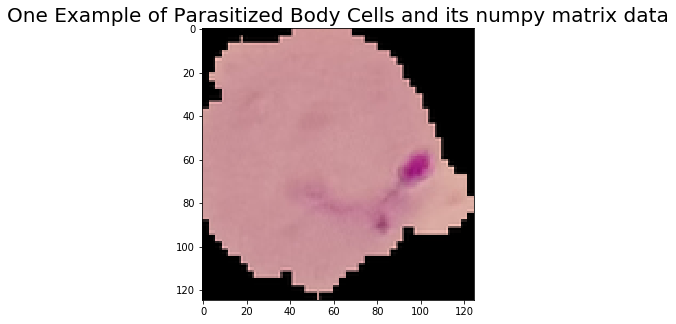

In [12]:
# np.random.seed(random_seed)
random_p=np.random.randint(0,parasitized_data.shape[0],size=1)
fig=plt.figure(figsize=(15,5))
plt.title("One Example of Parasitized Body Cells and its numpy matrix data",fontsize=20)

print(random_p)

for ind,rand in enumerate(random_p):
    ax_n=fig.add_subplot(1,1,ind+1)
    ax_n.imshow(parasitized_data[rand])
   
plt.show()
#parasitized_data[7188][0]

In [13]:
print(parasitized_data[578][0])

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  5   4 

In [14]:
parasitized_indices=np.arange(parasitized_data.shape[0])
uninfected_indices=np.arange(uninfected_data.shape[0])


np.random.seed(random_seed)
np.random.shuffle(parasitized_indices)
np.random.seed(random_seed)
np.random.shuffle(uninfected_indices)


parasitized_data=parasitized_data[parasitized_indices]
uninfected_data=uninfected_data[uninfected_indices]

In [15]:
print(parasitized_data.shape)
print(uninfected_data.shape)

(13779, 125, 125, 3)
(13779, 125, 125, 3)


In [16]:
train_test_split_ratio=3/4

parasitized_train=parasitized_data[:int(train_test_split_ratio*parasitized_data.shape[0])]
uninfected_train=uninfected_data[:int(train_test_split_ratio*uninfected_data.shape[0])]

parasitized_test=parasitized_data[int(train_test_split_ratio*parasitized_data.shape[0]):]
uninfected_test=uninfected_data[int(train_test_split_ratio*uninfected_data.shape[0]):]

In [17]:
print(parasitized_train)
# print(parasitized_test)
# print(uninfected_train)
# print(uninfected_test)


[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [18]:
%%time
train=np.append(parasitized_train,uninfected_train,axis=0)
test=np.append(parasitized_test,uninfected_test,axis=0)

CPU times: user 1.51 s, sys: 4.72 s, total: 6.23 s
Wall time: 13 s


In [19]:
print(train.shape)
print(test.shape)

(20668, 125, 125, 3)
(6890, 125, 125, 3)


In [20]:
train_labels=np.array([1]*parasitized_train.shape[0]+[0]*uninfected_train.shape[0])
test_labels=np.array([1]*parasitized_test.shape[0]+[0]*uninfected_test.shape[0])

In [21]:
print(parasitized_train.shape[0])

10334


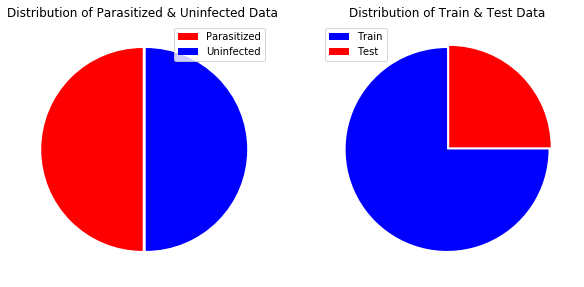

In [22]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax1.pie([parasitized_train.shape[0],uninfected_train.shape[0]],explode=[0,0.03],startangle=90,colors=['red','blue'])
ax1.set_title("Distribution of Parasitized & Uninfected Data")
ax1.legend(['Parasitized','Uninfected'],loc='best')
ax2=fig.add_subplot(122)
ax2.pie([train.shape[0],test.shape[0]],explode=[0,0.03],startangle=90,colors=['blue','red'])
ax2.set_title("Distribution of Train & Test Data")
ax2.legend(['Train','Test'],loc='best')
plt.show()

In [23]:
train_index=np.arange(train.shape[0])
np.random.seed(random_seed)
np.random.shuffle(train_index)
train=train[train_index]
train_labels=train_labels[train_index]

test_index=np.arange(test.shape[0])
np.random.seed(random_seed)
np.random.shuffle(test_index)
test=test[test_index]
test_labels=test_labels[test_index]

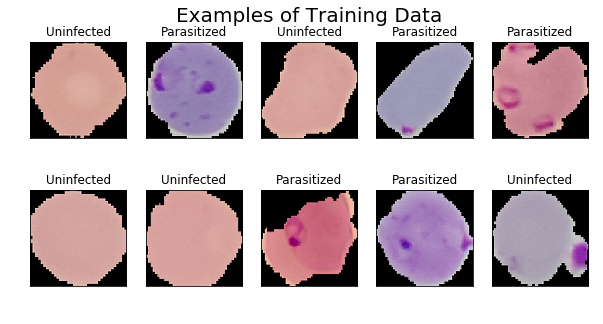

In [24]:
np.random.seed(random_seed)
random_10=np.random.randint(0,train.shape[0],size=10)
fig=plt.figure(figsize=(10,5))
plt.title("Examples of Training Data",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(train[rand])
    if(train_labels[rand]==1):
        ax_n.set_title("Parasitized")
    else:
        ax_n.set_title("Uninfected")
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

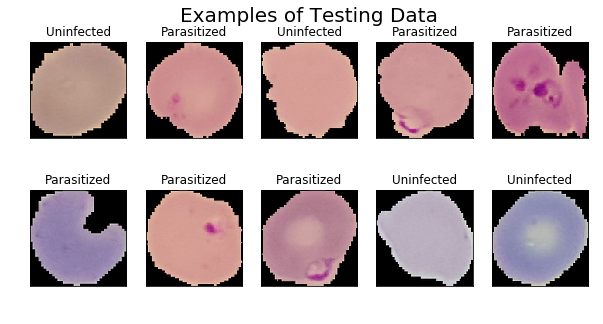

In [25]:
np.random.seed(random_seed)
random_10=np.random.randint(0,test.shape[0],size=10)
fig=plt.figure(figsize=(10,5))
plt.title("Examples of Testing Data",fontsize=20)
plt.axis('off')
for ind,rand in enumerate(random_10):
    ax_n=fig.add_subplot(2,5,ind+1)
    ax_n.imshow(test[rand])
    if(test_labels[rand]==1):
        ax_n.set_title("Parasitized")
    else:
        ax_n.set_title("Uninfected")
    ax_n.get_xaxis().set_visible(False)
    ax_n.get_yaxis().set_visible(False)
plt.show()

# Analyzing Blood Cell colour
For colour analysis, we try and plot the image histogram. The histogram plot tells us what is the most frequent intensity of each colour component...


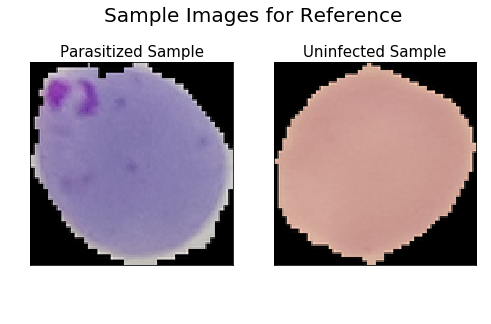

In [26]:
np.random.seed(random_seed)
rand=np.random.randint(parasitized_train.shape[0])
parasitized_sample=parasitized_train[rand]
np.random.seed(random_seed)
rand=np.random.randint(uninfected_train.shape[0])
uninfected_sample=uninfected_train[rand]

fig=plt.figure(figsize=(8,5))
plt.title("Sample Images for Reference",fontsize=20)
plt.axis('off')
ax1=fig.add_subplot(121)
ax1.imshow(parasitized_sample)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title("Parasitized Sample",fontsize=15)
ax2=fig.add_subplot(122)
ax2.imshow(uninfected_sample)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title("Uninfected Sample",fontsize=15)
plt.show()

In [27]:
def get_image_histogram(sample_data,title,to_return=False):
    sample=Image.fromarray(sample_data.astype(np.uint8),'RGB')
    hist=sample.histogram()
    hist_r=hist[:256]
    hist_g=hist[256:512]
    hist_b=hist[512:]
    if(to_return==True):
        return hist_r,hist_g,hist_b
    x=np.arange(256)
    
    fig=plt.figure(figsize=(12,5))
    plt.title(title+'\n',fontsize=20)
    plt.axis('off')
    ax1=fig.add_subplot(121)
    ax1.imshow(sample)
    ax1.set_title("Image",fontsize=15)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2=fig.add_subplot(122)
    ax2.plot(hist_r,color='red')
    ax2.fill_between(x,hist_r,color='red')
    ax2.plot(hist_g,color='green')
    ax2.fill_between(x,hist_g,color='green')
    ax2.plot(hist_b,color='blue')
    ax2.fill_between(x,hist_b,color='blue')
    ax2.set_ylim(0,3000)
    ax2.set_title("Image Histogram",fontsize=15)
    ax2.set_ylabel("Frequency")
    ax2.set_xlabel("Colour Intensity")
    plt.show()


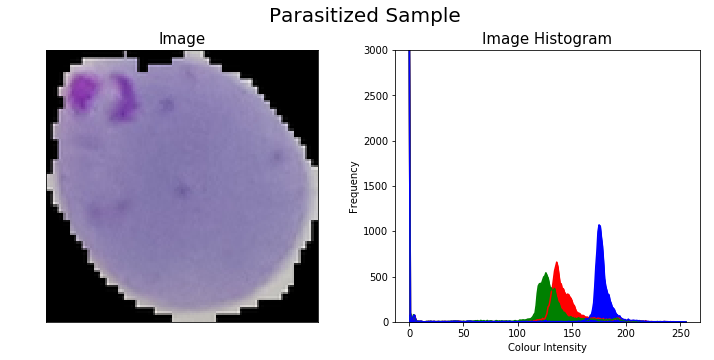

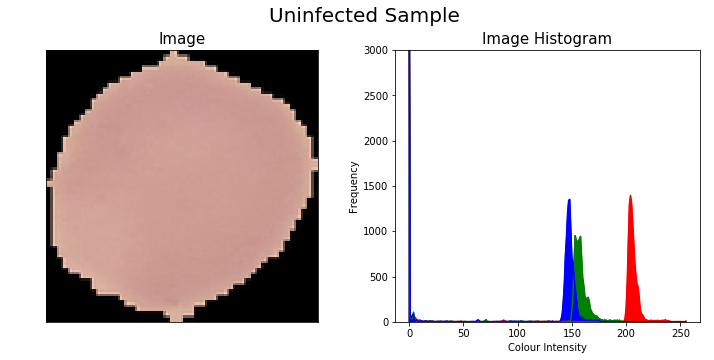

In [28]:

get_image_histogram(parasitized_sample,"Parasitized Sample")
get_image_histogram(uninfected_sample,"Uninfected Sample")

# Models 

In [29]:
%%time
from sklearn.model_selection import train_test_split
from collections import Counter

train_files, test_files, train_labels, test_labels = train_test_split(files_df['filename'].values,
                                                                      files_df['label'].values,
                                                                      test_size=0.3, random_state=42)
train_files, val_files, train_labels, val_labels = train_test_split(train_files,
                                                                    train_labels,
                                                                    test_size=0.1, random_state=42)

print(train_files.shape, val_files.shape, test_files.shape)
print('Train:', Counter(train_labels), '\nVal:', Counter(val_labels), '\nTest:', Counter(test_labels))


(17361,) (1929,) (8268,)
Train: Counter({'healthy': 8734, 'malaria': 8627}) 
Val: Counter({'healthy': 970, 'malaria': 959}) 
Test: Counter({'malaria': 4193, 'healthy': 4075})
CPU times: user 455 ms, sys: 191 ms, total: 646 ms
Wall time: 1.21 s


In [30]:
%%time
from concurrent import futures
import threading
# Setting a fix image dimension
IMG_DIMS = (125, 125)

def get_img_data_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=IMG_DIMS, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img

ex = futures.ThreadPoolExecutor(max_workers=None)
train_data_inp = [(idx, img, len(train_files)) for idx, img in enumerate(train_files)]
val_data_inp = [(idx, img, len(val_files)) for idx, img in enumerate(val_files)]
test_data_inp = [(idx, img, len(test_files)) for idx, img in enumerate(test_files)]

print('Loading Train Images:')
train_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in train_data_inp],
                        [record[1] for record in train_data_inp],
                        [record[2] for record in train_data_inp])
train_data = np.array(list(train_data_map))

print('\nLoading Validation Images:')
val_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in val_data_inp],
                        [record[1] for record in val_data_inp],
                        [record[2] for record in val_data_inp])
val_data = np.array(list(val_data_map))

print('\nLoading Test Images:')
test_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in test_data_inp],
                        [record[1] for record in test_data_inp],
                        [record[2] for record in test_data_inp])
test_data = np.array(list(test_data_map))

train_data.shape, val_data.shape, test_data.shape  

Loading Train Images:
ThreadPoolExecutor-0_0: working on img num: 0
ThreadPoolExecutor-0_0: working on img num: 5000
ThreadPoolExecutor-0_0: working on img num: 10000
ThreadPoolExecutor-0_8: working on img num: 15000
ThreadPoolExecutor-0_13: working on img num: 17360

Loading Validation Images:
ThreadPoolExecutor-0_12: working on img num: 0
ThreadPoolExecutor-0_5: working on img num: 1928

Loading Test Images:
ThreadPoolExecutor-0_12: working on img num: 0
ThreadPoolExecutor-0_6: working on img num: 5000
ThreadPoolExecutor-0_5: working on img num: 8267
CPU times: user 34.1 s, sys: 20.6 s, total: 54.8 s
Wall time: 30.7 s


In [31]:
%%time
# Before can we start training our models, we must set up some basic configuration settings.

BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (125, 125, 3)

train_imgs_scaled = train_data / 255.
val_imgs_scaled = val_data / 255.

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)

print(train_labels[:6], train_labels_enc[:6])


['malaria' 'malaria' 'malaria' 'healthy' 'healthy' 'malaria'] [1 1 1 0 0 1]
CPU times: user 2.1 s, sys: 7.89 s, total: 9.99 s
Wall time: 17.5 s


In [32]:
import tensorflow as tf

# Load the TensorBoard notebook extension (optional)
%load_ext tensorboard

# tf.random.set_seed(42)
tf.__version__


'2.0.0'

# Model 1: CNN from Scratch
### Build Model Architecture

In [33]:

inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), 
                               activation='relu', padding='same')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), 
                               activation='relu', padding='same')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

flat = tf.keras.layers.Flatten()(pool3)

hidden1 = tf.keras.layers.Dense(512, activation='relu')(flat)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)
hidden3 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop = tf.keras.layers.Dropout(rate=0.3)(hidden2)


out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 125, 125, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0     

### Train Model

In [34]:
%%time
import datetime

logdir = os.path.join('Movies/cell_images/tensorboard_logs_final', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.0005)

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, 
#                                              mode='auto', baseline=None, restore_best_weights=False)
callbacks = [reduce_lr, tensorboard_callback]

history = model.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS, 
                    validation_data=(val_imgs_scaled, val_labels_enc), 
                    callbacks=callbacks,
                    verbose=1)

Train on 17361 samples, validate on 1929 samples
Epoch 1/25
17361/17361 [==============================] - 424s 24ms/sample - loss: 0.4633 - accuracy: 0.7603 - val_loss: 0.2335 - val_accuracy: 0.9305
Epoch 2/25
17361/17361 [==============================] - 391s 22ms/sample - loss: 0.1683 - accuracy: 0.9459 - val_loss: 0.1675 - val_accuracy: 0.9482
Epoch 3/25
17361/17361 [==============================] - 378s 22ms/sample - loss: 0.1320 - accuracy: 0.9574 - val_loss: 0.1436 - val_accuracy: 0.9559
Epoch 4/25
17361/17361 [==============================] - 380s 22ms/sample - loss: 0.1094 - accuracy: 0.9630 - val_loss: 0.1642 - val_accuracy: 0.9456
Epoch 5/25
17361/17361 [==============================] - 377s 22ms/sample - loss: 0.0938 - accuracy: 0.9675 - val_loss: 0.1570 - val_accuracy: 0.9528
Epoch 6/25
17361/17361 [==============================] - 377s 22ms/sample - loss: 0.0597 - accuracy: 0.9781 - val_loss: 0.1853 - val_accuracy: 0.9513
Epoch 7/25
17361/17361 [=====================

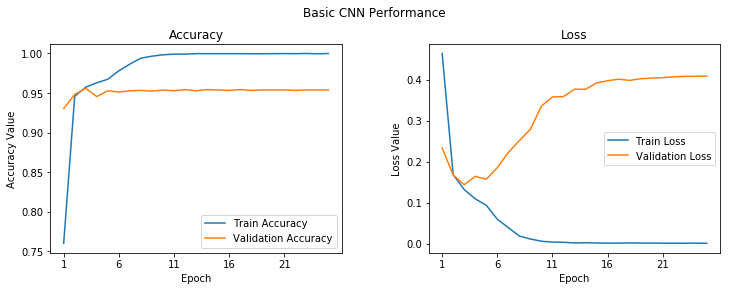

In [36]:
from sklearn.metrics import accuracy_score
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


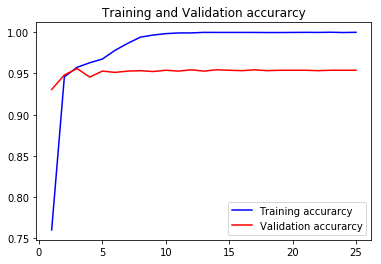

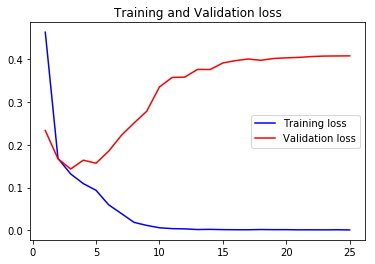

In [37]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [40]:
# Calculate errors and confusion matrix for the validation data
from sklearn.metrics import confusion_matrix
Y_pred_probabilities = model.predict(val_imgs_scaled)
Y_pred = np.round(Y_pred_probabilities)

errors = []
for i in range(len(Y_pred)):
    if Y_pred[i] != val_labels_enc[i]:
        errors.append([i, Y_pred_probabilities[i][0]])
sorted_errors = sorted(errors, key=lambda rec: rec[1], reverse=True)

print(confusion_matrix(val_labels_enc, Y_pred))
print("\nNumber of errors = ", len(sorted_errors))
print("Accuracy = ", (len(val_labels_enc) - len(sorted_errors)) / float(len(val_labels_enc)))

[[929  41]
 [ 48 911]]

Number of errors =  89
Accuracy =  0.9538621047174702


In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS, 
                    validation_data=(val_imgs_scaled, val_labels_enc), 
                    callbacks=callbacks,
                    verbose=1)



history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCH,
                    callbacks=[lrs],
                    verbose=1)

In [ ]:
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)


In [41]:
def display_errors(errors_index):
    """Show images with their predicted and real labels."""
    n = 0
    nrows = 4
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(10,10))
    for row in range(nrows):
        for col in range(ncols):
            index = errors_index[n][0]
            pred = errors_index[n][1]
            img = val_imgs_scaled[index]
            ax[row, col].imshow(img)
            ax[row, col].set_title("True:{} Pred:{:1.3f}".format(val_labels_enc[index], pred)                                                 )
            n += 1

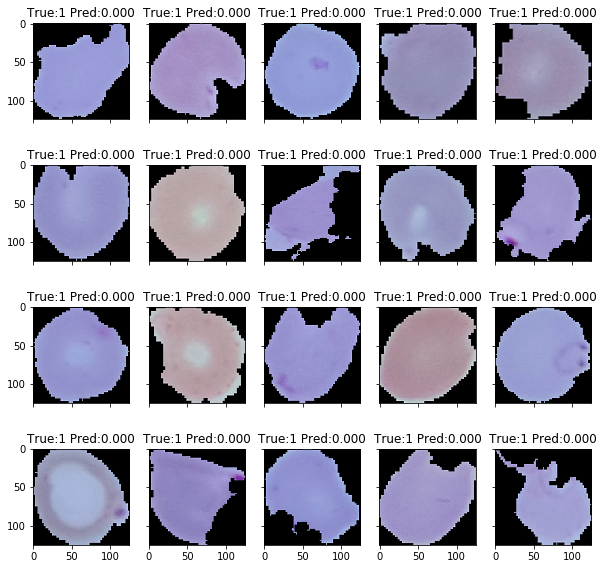

In [42]:
#show more mispredictions
display_errors(sorted_errors[-20:])

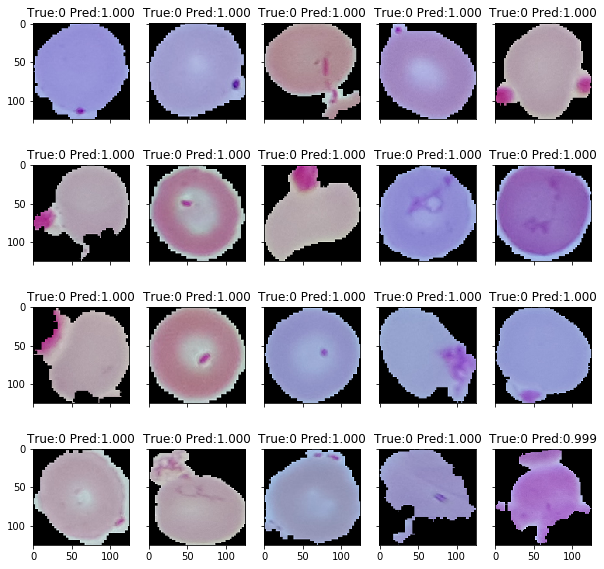

In [43]:
display_errors(sorted_errors[0:])

In [44]:
def display_nonerrors(nonerrors_index):
    """Show images with their predicted and real labels."""
    n = 1
    nrows = 4
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(10,10))
    for row in range(nrows):
        for col in range(ncols):
            index = nonerrors_index[n][0]
            pred = nonerrors_index[n][1]
            img = val_imgs_scaled[index]
            ax[row, col].imshow(img)
            ax[row, col].set_title("True:{} Pred:{:1.3f}".format(val_labels_enc[index], pred)                                                 )
            n += 1

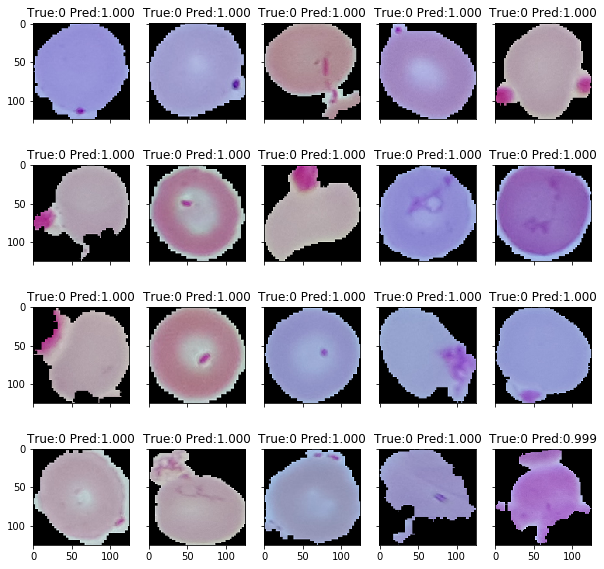

In [45]:
display_errors(sorted_errors[0:])

In [80]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
Y_pred_probabilities = model.predict(val_imgs_scaled)
Y_pred = np.round(Y_pred_probabilities)


In [54]:
accuracy = accuracy_score(val_labels_enc, Y_pred)
print('Accuracy: %f' % accuracy)


Accuracy: 0.953862


In [55]:
# precision tp / (tp + fp)
precision = precision_score(val_labels_enc, Y_pred)
print('Precision: %f' % precision)

Precision: 0.956933


In [56]:
# recall: tp / (tp + fn)
recall = recall_score(val_labels_enc, Y_pred)
print('Recall: %f' % recall)

Recall: 0.949948


In [57]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(val_labels_enc, Y_pred)
print('F1 score: %f' % f1)
 

F1 score: 0.953428


In [77]:
# kappa
kappa = cohen_kappa_score(val_labels_enc, Y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.907717


In [78]:
# ROC AUC
auc = roc_auc_score(val_labels_enc, Y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.953840


In [81]:
# confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(val_labels_enc, Y_pred)
print(matrix)

Confusion Matrix
[[929  41]
 [ 48 911]]


In [ ]:
# import tensorflow as tf
# from tensorflow.python.summary import summary_iterator

In [ ]:
# import os
# log_base_dir = 'Movies/cell_images/tensorboard_logs_v1'
# os.makedirs(log_base_dir,exist_ok = True)
# %tensorboard --logdir {log_base_dir}